# MEGALINE

# Introducción

LA MEJOR TARIFA

Trabajo como analista de datos para el operador de telecomunicaciones Megaline.

La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. 

El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad. Para ello, me han proporcionado los datos de 500 clientes.



# Objetivo

Analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Plan de acción

1. Limpieza de los datos para asegurar su calidad.
2. Análisis preliminar de las tarifas con base en los usuarios:
    * Región
    * Tarifa de prepago utilizada  
    * Llamadas realizadas
    * Mensajes enviados
    * Tráfico de internet utilizado
3. Distribución de la información por mes
4. Análisis estadístico descriptivo de los datos de los usuarios (llamadas, mensajes y tráfico de internet) con base en las tarifas contratadas.
5. Prueba de hipótesis de los ingresos reales de la empresa por cada tarifa para determinar si una es más rentable que la otra.
6. Hallazgos

# Inicialización

In [13134]:
# Cargo todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

# Carga de datos

In [13135]:
# Cargo los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

# Preparación de los datos

## Tarifas

In [13136]:
# Imprimo la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [13137]:
# Imprimo una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13138]:
# Imprimo una descripción general de los datos para las tarifas
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Al analizar este dataset:

1. Observo que contiene las dos tarifas de Megaline y lo que ofrece cada una a los clientes. 

2. Veo bien los datos, no hay datos ausentes y el tipo de datos de cada serie es adecuada para poder hacer un análisis sin tropiezos.

3. Los encabezados también son claros; solo requiero crear una columna con los datos de 'mb_per_month_included' convertidos a GB para homologar los datos relacionados con internet.

4. De acuerdo con la descripción de los datos, en promedio los planes incluyen 525 mensajes, 23GB y 1750 minutos. 

5. En cuanto a las tarifas, puedo observar:
    
    * Hay una gran diferencia respecto a los mensajes que ofrece cada tarifa pues Ultimate ofrece 20 veces más mensajes que Surf (con una variabilidad de 671.75 mensajes con respecto al promedio). 
    * Lo mismo pasa con los minutos incluidos ya que Ultimate ofrece 6 veces más minutos que Surf (con un variabilidad de 1767.77 minutos con respecto al promedio).
    * En cambio, en cuanto a la cantidad de internet, Ultimate ofrece solo el doble con respecto a Surf.
    * Con estos datos, puedo deducir que Ultimate sería una tarifa ideal para usuarios que prefieren enviar mensajes y hacer llamadas y Surf bien podría quedar para usuarios que prefieren más internet pues el pago de la tarifa es 3.5 veces más bajo que Ultimate.

### Corregir datos

In [13139]:
# Me aseguro de que los datos no tienen espacios al principio y al final
for col in df_plans.columns:
    if df_plans[col].dtype == 'object':
        df_plans[col] = df_plans[col].str.strip()
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13140]:
# Transformo la columna mb_per_month_included a gb
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [13141]:
# Imprimo la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13142]:
# Imprimo una muestra de datos para usuarios
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [13143]:
# Imprimo una descripción general de datos para usuarios
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Puedo observar que:
1. Hay algunos datos nulos en la columna 'churn_date'. Eso lo debo arreglar e intentar averiguar por qué.

2. Tambien cambiaré el tipo de dato para las columnas 'reg_date' y 'churn_date'.

3. Me gustaría revisar los datos únicos de la columna 'city' para ver la posibilidad de separar los datos de manera que sean más claros.

4. En general, para este dataset me aseguraré de que no existen duplicados o espacios en los datos.

5. En cuanto a la descripción de la información numérica:

    * Puedo observar que la edad promedio de los usuarios es de 46 años. Todos son mayores de edad y el usuario más longevo es de 75 años lo cual podría indicar un nicho de mercado muy amplio. Por otro lado, la variabilidad calculada es de casi 17 años lo cual indica que las edades de los usuarios podrían rondan entre los 29 y los 63 años.
    * También observo que los usuarios fueron seleccionados de acuerdo a su id, en un rango consecutivo que va del 1000 al 1499.

### Corregir los datos

In [13144]:
# Reviso filas duplicadas
df_users[df_users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [13145]:
# Cambio el tipo de datos de object a datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors='coerce', infer_datetime_format=True)
df_users['reg_date'].unique()

/var/folders/r2/pwb3zvz948v6cw4px750f0dc0000gn/T/ipykernel_72178/4031525512.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors='coerce', infer_datetime_format=True)


<DatetimeArray>
['2018-12-24 00:00:00', '2018-08-13 00:00:00', '2018-10-21 00:00:00',
 '2018-01-28 00:00:00', '2018-05-23 00:00:00', '2018-11-29 00:00:00',
 '2018-11-27 00:00:00', '2018-07-11 00:00:00', '2018-08-03 00:00:00',
 '2018-04-22 00:00:00',
 ...
 '2018-12-29 00:00:00', '2018-05-28 00:00:00', '2018-11-07 00:00:00',
 '2018-01-31 00:00:00', '2018-04-10 00:00:00', '2018-12-27 00:00:00',
 '2018-04-25 00:00:00', '2018-05-15 00:00:00', '2018-01-20 00:00:00',
 '2018-02-04 00:00:00']
Length: 266, dtype: datetime64[ns]

In [13146]:
# Reviso la columna churn_date para indagar sobre los nulos
df_users[df_users['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [13147]:
# Cuento cuántas filas en churn_date tienen una fecha registrada
inactive_users = df_users[~df_users['churn_date'].isna()]
len(inactive_users)

34

Despues de observar los datos nulos en la columna 'churn date', concluyo con que todas estas filas corresponden a clientes activos; es decir, que siguen siendo clientes de Megaline.

Los 34 usuarios que tienen una fecha registrada en esta columna son usuarios que dejaron de usar la tarifa.

También, puede ser que hayan cambiado de tarifa y se les haya asignado un nuevo id de usuario; sin embargo, esto último es solo una suposición pues carezco de información de validarlo.

Aún así, es una cantidad pequeña de usuarios inactivos que no impacta considerablemente en mi análisis. Para ubicarlos mejor y que no me efecte los datos nulos, le pondré como fecha '2000-01-01'

In [13148]:
# Cambio el tipo de datos de object a datetime y cambia los NaN por una fecha específica '2000-01-01'
df_users['churn_date'] = df_users['churn_date'].fillna(pd.Timestamp('2000-01-01'))
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce', infer_datetime_format=True)
df_users['churn_date'].unique()

/var/folders/r2/pwb3zvz948v6cw4px750f0dc0000gn/T/ipykernel_72178/3778316241.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce', infer_datetime_format=True)


<DatetimeArray>
['2000-01-01 00:00:00', '2018-12-18 00:00:00', '2018-11-16 00:00:00',
 '2018-09-07 00:00:00', '2018-12-30 00:00:00', '2018-10-07 00:00:00',
 '2018-12-31 00:00:00', '2018-11-24 00:00:00', '2018-11-11 00:00:00',
 '2018-12-12 00:00:00', '2018-11-14 00:00:00', '2018-12-27 00:00:00',
 '2018-11-29 00:00:00', '2018-12-22 00:00:00', '2018-11-30 00:00:00',
 '2018-10-13 00:00:00', '2018-07-31 00:00:00', '2018-12-15 00:00:00',
 '2018-12-19 00:00:00', '2018-10-03 00:00:00', '2018-10-22 00:00:00',
 '2018-08-16 00:00:00', '2018-12-26 00:00:00', '2018-09-01 00:00:00',
 '2018-11-21 00:00:00', '2018-08-19 00:00:00', '2018-12-10 00:00:00',
 '2018-09-17 00:00:00', '2018-11-18 00:00:00', '2018-09-18 00:00:00']
Length: 30, dtype: datetime64[ns]

In [13149]:
# Reviso usuarios duplicados
users_duplicates = df_users[df_users.duplicated(subset=['first_name', 'last_name'], keep=False)]
users_duplicates

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [13150]:
# Verifico los datos en la columna plan
df_users['plan'].value_counts()

plan
surf        339
ultimate    161
Name: count, dtype: int64

### Enriquecer los datos

In [13151]:
# Creo una columna llamada state para separar ciudad y estado
df_users['state'] = df_users['city'].str.split(',').str[1].str.strip()
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2000-01-01,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2000-01-01,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2000-01-01,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2000-01-01,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2000-01-01,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2000-01-01,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2000-01-01,LA MSA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2000-01-01,CA MSA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2000-01-01,NY-NJ-PA MSA


In [13152]:
# Dejo la columna city solo con los nombres de las ciudades
df_users['city'] = df_users['city'].str.split(',').str[0].str.strip()
df_users


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,2000-01-01,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,2000-01-01,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,2000-01-01,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,2000-01-01,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,2000-01-01,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,New York-Newark-Jersey City,2018-09-04,surf,2000-01-01,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,2000-01-01,LA MSA
497,1497,Donte,Barrera,49,Los Angeles-Long Beach-Anaheim,2018-12-10,ultimate,2000-01-01,CA MSA
498,1498,Scot,Williamson,51,New York-Newark-Jersey City,2018-02-04,surf,2000-01-01,NY-NJ-PA MSA


## Llamadas

In [13153]:
# Imprimo la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13154]:
# Imprimo una muestra de datos para las llamadas
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [13155]:
# Imprimo una descripción general de datos para llamadas
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


En este dataset observo: 

1. No hay datos ausentes.

2. Cada fila es una llamada realizada y puede haber varias llamadas hechas por el mismo usuario en fechas distintas.

3. En cuanto a la descripción observo:
    * Tenemos 137,735 llamadas registradas para analizar.
    * Las llamadas duran 6.75 minutos en promedio. Según los datos, la mayoria duran entre 0.91 y 12.59 minutos, según la variabilidad. 
    * Hay llamadas que duran 0 minutos. Debo revisar esto.
    * La llamada más larga fue de 37.6 minutos lo cuál sale mucho de la distribución normal de los datos. Más adelante revisaré este punto.

4. Para la columna call_date cambiaré el tipo de datos.

5. Para la columna duration, redondearé cada dato al siguiente entero y transformaré el tipo de datos a entero.

6. Agregaré una columna que contenga solo el mes.



### Corregir los datos

In [13156]:
# Reviso filas duplicadas
df_calls[df_calls.duplicated()]

,id,user_id,call_date,duration


In [13157]:
# Reviso los datos de la columna id
df_calls['id'].sort_values().unique()

array(['1000_145', '1000_247', '1000_309', ..., '1499_97', '1499_98',
       '1499_99'], dtype=object)

In [13158]:
# Cambio el tipo de datos de object a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce', infer_datetime_format=True)
df_calls['call_date'].unique()

/var/folders/r2/pwb3zvz948v6cw4px750f0dc0000gn/T/ipykernel_72178/3064590504.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce', infer_datetime_format=True)


<DatetimeArray>
['2018-12-27 00:00:00', '2018-12-28 00:00:00', '2018-12-30 00:00:00',
 '2018-12-31 00:00:00', '2018-12-26 00:00:00', '2018-12-29 00:00:00',
 '2018-09-06 00:00:00', '2018-10-12 00:00:00', '2018-10-17 00:00:00',
 '2018-12-05 00:00:00',
 ...
 '2018-02-26 00:00:00', '2018-02-10 00:00:00', '2018-02-19 00:00:00',
 '2018-02-18 00:00:00', '2018-02-21 00:00:00', '2018-01-24 00:00:00',
 '2018-02-20 00:00:00', '2018-02-28 00:00:00', '2018-01-26 00:00:00',
 '2018-01-21 00:00:00']
Length: 351, dtype: datetime64[ns]

In [13159]:
# Reviso las llamadas que duran 0 minutos
df_calls[df_calls['duration'] == 0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


### Enriquecer los datos

In [13160]:
# Agrego una nueva columna y la redondeo al siguiente entero
df_calls['duration_min_seg'] = np.ceil(df_calls['duration']).astype(int)
df_calls


,id,user_id,call_date,duration,duration_min_seg
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9
137731,1499_200,1499,2018-10-20,10.89,11
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,1


In [13161]:
# Agrego una columna que contenga solo el mes
df_calls['month'] = df_calls['call_date'].dt.month
df_calls

,id,user_id,call_date,duration,duration_min_seg,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10


## Mensajes

In [13162]:
# Imprimo la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13163]:
# Imprimo una muestra de datos para los mensajes
df_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [13164]:
# Imprimo una descripción general de datos para mensajes
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


1. Observo que no hay datos ausentes.

2. La columna message_date tiene un tipo de datos object. Lo modificaré para que tenga un tipo de datos de datetime.

3. Los usuarios 1498 y 1499 no tienen mensajes registrados en este dataset.

4. Agregaré una columna que contenga solo el mes.

### Corregir los datos

In [13165]:
#Reviso filas duplicadas
df_messages[df_messages.duplicated()]

,id,user_id,message_date


In [13166]:
#Transformo la columna message_date a datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce', infer_datetime_format=True)
df_messages['message_date'].unique()

/var/folders/r2/pwb3zvz948v6cw4px750f0dc0000gn/T/ipykernel_72178/1572478773.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce', infer_datetime_format=True)


<DatetimeArray>
['2018-12-27 00:00:00', '2018-12-31 00:00:00', '2018-12-26 00:00:00',
 '2018-12-29 00:00:00', '2018-12-30 00:00:00', '2018-12-28 00:00:00',
 '2018-12-25 00:00:00', '2018-11-14 00:00:00', '2018-08-17 00:00:00',
 '2018-12-05 00:00:00',
 ...
 '2018-01-30 00:00:00', '2018-01-31 00:00:00', '2018-02-12 00:00:00',
 '2018-02-07 00:00:00', '2018-02-06 00:00:00', '2018-02-14 00:00:00',
 '2018-02-18 00:00:00', '2018-01-19 00:00:00', '2018-01-29 00:00:00',
 '2018-01-24 00:00:00']
Length: 351, dtype: datetime64[ns]

### Enriquecer los datos

In [13167]:
#Verifico la columna user_id
df_messages['user_id'].value_counts()

user_id
1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1477       3
1190       3
1161       2
1323       1
1479       1
Name: count, Length: 402, dtype: int64

In [13168]:
# Agrego una columna que contenga solo el mes
df_messages['month'] = df_messages['message_date'].dt.month

## Internet

In [13169]:
# Imprimo la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [13170]:
# Imprimo una muestra de datos para el tráfico de internet
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [13171]:
# Imprimo una descripción general de datos para internet
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


1. Sigo viendo el mismo problema del tipo de dato de fecha como en los otros DataFrames así que lo corregiré.

2. No veo valores ausentes pero revisaré duplicados.

3. Agregaré una columna que contenga solo el mes.

4. Agregaré una columna con los gb usados haciendo la transformación correspondiente.

4. En cuanto a la descripción observo:
    * En promedio, los usuarios usan 366.71mb al día.
    * Normalmente usan entre 89.54 y 643.88mb al día. Hay consumos diarios de internet de 1693.47mb al día lo cuál varia mucho del promedio. Valdría la pena revisar estos outliers.
    * Tambien hay días donde algunos usuarios no usaron internet pues aparecen en ceros.

### Corregir los datos

In [13172]:
# Reviso si hay filas duplicadas
df_internet[df_internet.duplicated()]

,id,user_id,session_date,mb_used


In [13173]:
# Transformo la columna session_date a datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce', infer_datetime_format=True)
df_internet['session_date'].unique()

/var/folders/r2/pwb3zvz948v6cw4px750f0dc0000gn/T/ipykernel_72178/4210259000.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce', infer_datetime_format=True)


<DatetimeArray>
['2018-12-29 00:00:00', '2018-12-31 00:00:00', '2018-12-28 00:00:00',
 '2018-12-26 00:00:00', '2018-12-27 00:00:00', '2018-08-24 00:00:00',
 '2018-12-09 00:00:00', '2018-11-04 00:00:00', '2018-11-27 00:00:00',
 '2018-12-13 00:00:00',
 ...
 '2018-02-17 00:00:00', '2018-01-23 00:00:00', '2018-02-10 00:00:00',
 '2018-02-15 00:00:00', '2018-02-14 00:00:00', '2018-02-08 00:00:00',
 '2018-02-09 00:00:00', '2018-01-28 00:00:00', '2018-02-21 00:00:00',
 '2018-01-18 00:00:00']
Length: 351, dtype: datetime64[ns]

In [13174]:
# Verifico los registros de consumo de internet en ceros
df_internet[df_internet['mb_used'] == 0]

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


### Enriquecer los datos

In [13175]:
# Agrego una columna que contenga solo el mes
df_internet['month'] = df_internet['session_date'].dt.month

In [13176]:
# Agrego una columna que contenga solo el consumo de internet en gb
df_internet['gb_used'] = df_internet['mb_used']/1024

# Estudio de las condiciones de las tarifas

In [13177]:
# Imprimo las condiciones de la tarifa y me aseguro de que queden claras
surf = df_plans[df_plans['plan_name'] == 'surf'].T
ultimate = df_plans[df_plans['plan_name'] == 'ultimate'].T
surf.columns = ['Surf']
ultimate.columns = ['Ultimate']
print(surf)
print()
print(ultimate)


                        Surf
messages_included         50
mb_per_month_included  15360
minutes_included         500
usd_monthly_pay           20
usd_per_gb                10
usd_per_message         0.03
usd_per_minute          0.03
plan_name               surf
gb_per_month_included   15.0

                       Ultimate
messages_included          1000
mb_per_month_included     30720
minutes_included           3000
usd_monthly_pay              70
usd_per_gb                    7
usd_per_message            0.01
usd_per_minute             0.01
plan_name              ultimate
gb_per_month_included      30.0


# Agregación de datos por usuario


In [13178]:
# Calculo el número de llamadas hechas por cada usuario al mes. Guardo el resultado.
calls_user_month = df_calls.groupby('month')['user_id'].value_counts().reset_index(name='call_count')
calls_user_month_pivot = calls_user_month.pivot(index='user_id', columns='month', values='call_count').fillna(0)
calls_user_month_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,49.0,65.0,64.0,56.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,55.0,47.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
1004,0.0,0.0,0.0,0.0,21.0,44.0,49.0,49.0,42.0,61.0,54.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,75.0,61.0,65.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,52.0,46.0,39.0,40.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0


In [13179]:
# Calculo la cantidad de minutos usados por cada usuario al mes. Guardo el resultado.
minutes_user_month = df_calls.groupby(['month','user_id'])['duration'].sum().reset_index(name='duration_count')
minutes_user_month_pivot = minutes_user_month.pivot(index='user_id', columns='month', values='duration_count').fillna(0)
minutes_user_month_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,116.83
1001,0.0,0.00,0.00,0.00,0.00,0.00,0.00,171.14,297.69,374.11,404.59,392.93
1002,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.13,359.76,363.24
1003,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1041.00
1004,0.0,0.00,0.00,0.00,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,283.46,578.03,337.45,467.47
1496,0.0,0.00,0.00,0.00,0.00,0.00,0.00,114.62,389.94,301.16,291.88,278.61
1497,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,276.53


In [13180]:
# Calculo el número de mensajes enviados por cada usuario al mes. Guardo el resultado.
messages_user_month = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')
messages_user_month_pivot = messages_user_month.pivot(index='user_id', columns='month', values='messages_count').fillna(0)
messages_user_month_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,44.0,53.0,36.0,44.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,32.0,41.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
1004,0.0,0.0,0.0,0.0,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.0,0.0,0.0,6.0,45.0,54.0,64.0,50.0,50.0,51.0,46.0,43.0
1492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,29.0,31.0,37.0
1494,0.0,0.0,0.0,0.0,0.0,0.0,20.0,27.0,21.0,38.0,35.0,33.0


In [13181]:
# Calculo el volumen del tráfico de Internet usado por cada usuario al mes. Guardo el resultado.
internet_user_month = df_internet.groupby(['month','user_id'])['gb_used'].sum().reset_index(name='internet_count')
internet_user_month['total_gb_used'] = internet_user_month['internet_count']
internet_user_month['total_gb_used'] = np.ceil(internet_user_month['total_gb_used']).astype(int)   
internet_user_month_pivot = internet_user_month.pivot(index='user_id', columns='month', values='total_gb_used').fillna(0)
internet_user_month_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,22.0,19.0,19.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,19.0,15.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
1004,0.0,0.0,0.0,0.0,7.0,21.0,24.0,28.0,19.0,15.0,22.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,27.0,25.0,24.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,17.0,14.0,9.0,17.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [13182]:
# Fusiono los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = pd.merge(calls_user_month,minutes_user_month,on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, messages_user_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, internet_user_month[['user_id', 'month', 'total_gb_used']], on=['user_id', 'month'], how='outer').fillna(0)
print(merged_data)

      month  user_id  call_count  duration_count  messages_count  \
0         1     1196        42.0          272.56            23.0   
1         1     1362        42.0          278.85            21.0   
2         1     1077        42.0          275.07            37.0   
3         1     1185        23.0          170.29             0.0   
4         1     1042        18.0          106.83             0.0   
...     ...      ...         ...             ...             ...   
2288     12     1349         0.0            0.00            61.0   
2289      5     1361         0.0            0.00             2.0   
2290     10     1482         0.0            0.00             2.0   
2291      6     1311         0.0            0.00             0.0   
2292     12     1108         0.0            0.00             0.0   

      total_gb_used  
0               9.0  
1               8.0  
2              11.0  
3               7.0  
4               2.0  
...             ...  
2288           13.0  
2289   

In [13183]:
# Añado la información de la tarifa y region
df_users['region'] = df_users['state'].apply(lambda x: 'NY-NJ' if 'NY-NJ' in x else 'Other')
merged_data = pd.merge(merged_data, df_users[['user_id','plan','region']], on=['user_id'], how='outer').fillna(0)
merged_data

,month,user_id,call_count,duration_count,messages_count,total_gb_used,plan,region
0,1.0,1196,42.0,272.56,23.0,9.0,ultimate,Other
1,2.0,1196,78.0,488.77,23.0,20.0,ultimate,Other
2,3.0,1196,92.0,572.93,26.0,31.0,ultimate,Other
3,4.0,1196,73.0,462.20,30.0,24.0,ultimate,Other
4,5.0,1196,66.0,404.26,30.0,23.0,ultimate,Other
...,...,...,...,...,...,...,...,...
2298,0.0,1307,0.0,0.00,0.0,0.0,surf,Other
2299,0.0,1319,0.0,0.00,0.0,0.0,surf,Other
2300,0.0,1378,0.0,0.00,0.0,0.0,surf,Other
2301,0.0,1463,0.0,0.00,0.0,0.0,ultimate,Other


In [13184]:
# Calculo el ingreso mensual para cada usuario
# Añado la información de los planes
merged_data = pd.merge(merged_data, df_plans, left_on='plan', right_on='plan_name', how='left')
merged_data = merged_data[['user_id', 'month', 'region', 'call_count', 'duration_count', 'messages_count', 'total_gb_used', 'plan', 'usd_monthly_pay', 'messages_included', 'usd_per_message', 'gb_per_month_included', 'usd_per_gb', 'minutes_included', 'usd_per_minute']]
merged_data

,user_id,month,region,call_count,duration_count,messages_count,total_gb_used,plan,usd_monthly_pay,messages_included,usd_per_message,gb_per_month_included,usd_per_gb,minutes_included,usd_per_minute
0,1196,1.0,Other,42.0,272.56,23.0,9.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1196,2.0,Other,78.0,488.77,23.0,20.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1196,3.0,Other,92.0,572.93,26.0,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1196,4.0,Other,73.0,462.20,30.0,24.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1196,5.0,Other,66.0,404.26,30.0,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,Other,0.0,0.00,0.0,0.0,surf,20,50,0.03,15.0,10,500,0.03
2299,1319,0.0,Other,0.0,0.00,0.0,0.0,surf,20,50,0.03,15.0,10,500,0.03
2300,1378,0.0,Other,0.0,0.00,0.0,0.0,surf,20,50,0.03,15.0,10,500,0.03
2301,1463,0.0,Other,0.0,0.00,0.0,0.0,ultimate,70,1000,0.01,30.0,7,3000,0.01


In [13185]:
# Verifico la actividad de los usuarios
zero_users = merged_data[
    (merged_data['call_count'] == 0) &
    (merged_data['duration_count'] == 0) &
    (merged_data['messages_count'] == 0) &
    (merged_data['total_gb_used'] == 0)
]
merged_users_zeros = pd.merge(zero_users, df_users, on='user_id', how='left')

# Hago una lista de user_id de ceros
user_ids_zeros = zero_users['user_id'].tolist()

# Filtro basándome en los user_id en ceros pero activos
filtered_data_zeros = df_users[df_users['user_id'].isin(user_ids_zeros)]
filtered_data_zeros_churn = filtered_data_zeros[filtered_data_zeros['churn_date'] == '2000-01-01']
filtered_data_zeros_churn

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,region
25,1025,Jess,Wilkinson,64,Atlanta-Sandy Springs-Roswell,2018-10-28,ultimate,2000-01-01,GA MSA,Other
143,1143,Lorina,Stevens,69,Cincinnati,2018-10-26,surf,2000-01-01,OH-KY-IN MSA,Other
275,1275,Elvie,Velazquez,33,New York-Newark-Jersey City,2018-11-29,ultimate,2000-01-01,NY-NJ-PA MSA,NY-NJ
307,1307,Kristopher,Lang,28,Boston-Cambridge-Newton,2018-12-31,surf,2000-01-01,MA-NH MSA,Other
319,1319,Eliseo,Carson,21,Colorado Springs,2018-06-17,surf,2000-01-01,CO MSA,Other
378,1378,Mckinley,Clayton,22,Denver-Aurora-Lakewood,2018-12-17,surf,2000-01-01,CO MSA,Other
463,1463,Dinorah,Simmons,30,Atlanta-Sandy Springs-Roswell,2018-11-27,ultimate,2000-01-01,GA MSA,Other
473,1473,Kirk,Velez,61,Louisville/Jefferson County,2018-12-31,surf,2000-01-01,KY-IN MSA,Other


Observo 8 usuarios activos que no tienen actividad en su tarifa. Los conservaré en los datos ya que son muy pocos y no afecta en mi análisis.

In [13186]:
# Calculo la diferencia de cada rubro mensual para cada usuario
merged_data['minutes_exceeded'] = merged_data['duration_count'] - merged_data['minutes_included']
merged_data['minutes_exceeded'] = merged_data['minutes_exceeded'].apply(lambda x: max(x, 0))
merged_data['messages_exceeded'] = merged_data['messages_count'] - merged_data['messages_included']
merged_data['messages_exceeded'] = merged_data['messages_exceeded'].apply(lambda x: max(x, 0))
merged_data['gb_exceeded'] = merged_data['total_gb_used'] - merged_data['gb_per_month_included']
merged_data['gb_exceeded'] = merged_data['gb_exceeded'].apply(lambda x: max(x, 0))

#Calculo el costo por los rubros excedidos
merged_data['cost_minutes_exceeded'] = merged_data['minutes_exceeded'] * merged_data['usd_per_minute']
merged_data['cost_messages_exceeded'] = merged_data['messages_exceeded'] * merged_data['usd_per_message']
merged_data['cost_gb_exceeded'] = merged_data['gb_exceeded'] * merged_data['usd_per_gb']

#Sumo todos los costos más la renta mensual
merged_data['total_revenue'] = merged_data['cost_minutes_exceeded'] + merged_data['cost_messages_exceeded'] + merged_data['cost_gb_exceeded'] + merged_data['usd_monthly_pay']
monthly_income = merged_data.groupby(['user_id', 'month','plan'])['total_revenue'].sum().reset_index(name='income_month')
monthly_income.round(2)

,user_id,month,plan,income_month
0,1000,12.0,ultimate,70.00
1,1001,8.0,surf,20.00
2,1001,9.0,surf,20.00
3,1001,10.0,surf,90.09
4,1001,11.0,surf,60.00
...,...,...,...,...
2298,1498,12.0,surf,100.00
2299,1499,9.0,surf,20.00
2300,1499,10.0,surf,70.00
2301,1499,11.0,surf,40.00


In [13187]:
# Filtro por surf
monthly_income[monthly_income['plan'] == 'surf']

,user_id,month,plan,income_month
1,1001,8.0,surf,20.00
2,1001,9.0,surf,20.00
3,1001,10.0,surf,90.09
4,1001,11.0,surf,60.00
5,1001,12.0,surf,60.00
...,...,...,...,...
2298,1498,12.0,surf,100.00
2299,1499,9.0,surf,20.00
2300,1499,10.0,surf,70.00
2301,1499,11.0,surf,40.00


In [13188]:
monthly_income[(monthly_income['plan'] == 'surf') & (monthly_income['income_month'] > 20)].count()

user_id         1120
month           1120
plan            1120
income_month    1120
dtype: int64

In [13189]:
monthly_income[(monthly_income['plan'] == 'surf') & (monthly_income['income_month'] == 20)].count()

user_id         459
month           459
plan            459
income_month    459
dtype: int64

In [13190]:
# Filtro por ultimate
monthly_income[monthly_income['plan'] == 'ultimate']

,user_id,month,plan,income_month
0,1000,12.0,ultimate,70.0
19,1006,11.0,ultimate,70.0
20,1006,12.0,ultimate,84.0
26,1008,10.0,ultimate,70.0
27,1008,11.0,ultimate,70.0
...,...,...,...,...
2268,1493,9.0,ultimate,70.0
2269,1493,10.0,ultimate,70.0
2270,1493,11.0,ultimate,70.0
2271,1493,12.0,ultimate,70.0


In [13191]:
monthly_income[(monthly_income['plan'] == 'ultimate') & (monthly_income['income_month'] > 70)].count()

user_id         41
month           41
plan            41
income_month    41
dtype: int64

In [13192]:
monthly_income[(monthly_income['plan'] == 'ultimate') & (monthly_income['income_month'] == 70)].count()


user_id         683
month           683
plan            683
income_month    683
dtype: int64

Puedo observar que los usuarios de Surf suelen pagar más cada mes del importe de su renta mensual.

En cambio, los usuarios de Ultimate al parecer mantienen poca variabilidad en su pago final con respecto a la renta mensual. 

# Estudio del comportamiento de usuario

## Llamadas

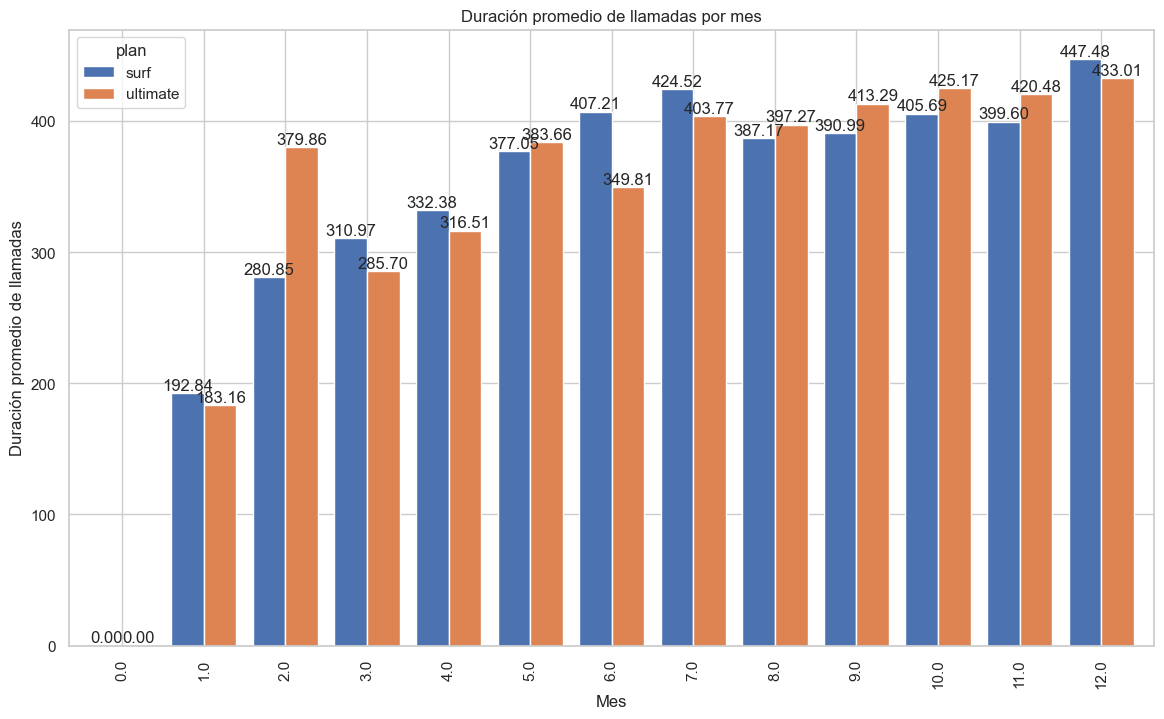

In [13193]:
# Comparo la duración promedio de llamadas por cada plan y por cada mes. Trazo un gráfico de barras para visualizarla.
duration_mean_month = merged_data.groupby(['user_id', 'month', 'plan'])['duration_count'].sum().reset_index()
duration_mean_month = duration_mean_month.groupby(['month', 'plan'])['duration_count'].mean().reset_index()

duration_mean_month_resume = duration_mean_month.pivot(index='month', columns='plan', values='duration_count')
ax = duration_mean_month_resume.plot(kind='bar',
                  figsize=(14, 8),
                  width = 0.8,
                  title = 'Duración promedio de llamadas por mes',
                  xlabel = 'Mes',
                  ylabel = 'Duración promedio de llamadas',
                  legend= 'plan'              
)

# Agrego etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')


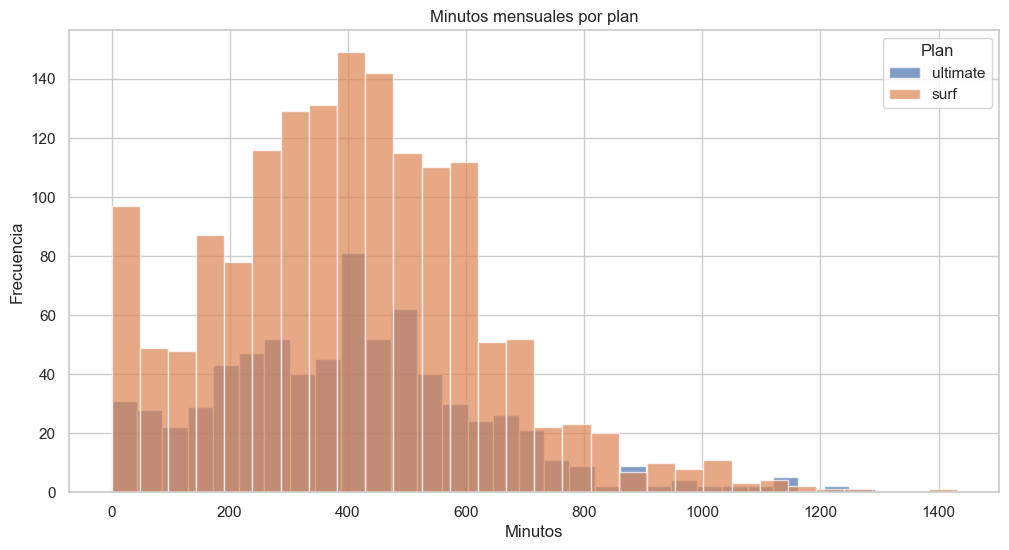

In [13194]:
# Comparo el número de minutos mensuales que necesitan los usuarios de cada plan. Trazo un histograma.
minutes_month = merged_data.groupby(['user_id', 'month', 'plan'])['duration_count'].sum().reset_index().fillna(0)
plans = minutes_month['plan'].unique()

plt.figure(figsize=(12, 6))
for plan in plans:
    subset = minutes_month[minutes_month['plan'] == plan]
    plt.hist(subset['duration_count'], bins=30, alpha=0.7, label=plan)
plt.title('Minutos mensuales por plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()


In [13195]:
# Calculo algunas estadísticas de la duración mensual de llamadas
call_stats_by_plan = merged_data.groupby('plan')['duration_count'].agg(['mean', 'var', 'median', 'std']).reset_index()
call_stats_by_plan['mode'] = merged_data.groupby('plan')['duration_count'].agg(lambda x: x.mode()[0])
call_stats_by_plan.columns = ['Plan', 'Mean_Call_Duration', 'Variance_Call_Duration', 'Median_Call_Duration', 'Std_Call_Duration', 'Mode_Call_Duration']
call_stats_by_plan


,Plan,Mean_Call_Duration,Variance_Call_Duration,Median_Call_Duration,Std_Call_Duration,Mode_Call_Duration
0,surf,403.224345,49568.849927,400.280,222.640630,NaN
1,ultimate,403.948923,52263.047679,398.235,228.611128,NaN


In [13196]:
# Verifico la moda contando los valores
mode_calls_count = merged_data['duration_count'].value_counts()
mode_calls_count


duration_count
0.00      47
421.54     2
431.44     2
440.52     2
566.61     2
          ..
294.26     1
285.14     1
327.51     1
288.43     1
27.03      1
Name: count, Length: 2215, dtype: int64

In [13197]:
# Reviso la información de los usuarios que tienen cero en duración de llamadas
check_mode_merge = merged_data[merged_data['duration_count'] == 0]
check_mode_merge

,user_id,month,region,call_count,duration_count,messages_count,total_gb_used,plan,usd_monthly_pay,messages_included,...,usd_per_gb,minutes_included,usd_per_minute,minutes_exceeded,messages_exceeded,gb_exceeded,cost_minutes_exceeded,cost_messages_exceeded,cost_gb_exceeded,total_revenue
343,1028,2.0,Other,0.0,0.0,12.0,13.0,ultimate,70,1000,...,7,3000,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1019,1361,5.0,Other,0.0,0.0,2.0,2.0,surf,20,50,...,10,500,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
1273,1311,6.0,Other,0.0,0.0,0.0,2.0,ultimate,70,1000,...,7,3000,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1278,1224,6.0,Other,0.0,0.0,5.0,3.0,ultimate,70,1000,...,7,3000,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2053,1094,10.0,Other,1.0,0.0,0.0,2.0,surf,20,50,...,10,500,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2058,1482,10.0,NY-NJ,0.0,0.0,2.0,0.0,ultimate,70,1000,...,7,3000,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2190,1407,11.0,NY-NJ,2.0,0.0,1.0,1.0,ultimate,70,1000,...,7,3000,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2263,1080,8.0,NY-NJ,0.0,0.0,31.0,21.0,surf,20,50,...,10,500,0.03,0.0,0.0,6.0,0.0,0.00,60.0,80.00
2264,1080,9.0,NY-NJ,0.0,0.0,64.0,25.0,surf,20,50,...,10,500,0.03,0.0,14.0,10.0,0.0,0.42,100.0,120.42
2265,1080,10.0,NY-NJ,0.0,0.0,59.0,30.0,surf,20,50,...,10,500,0.03,0.0,9.0,15.0,0.0,0.27,150.0,170.27


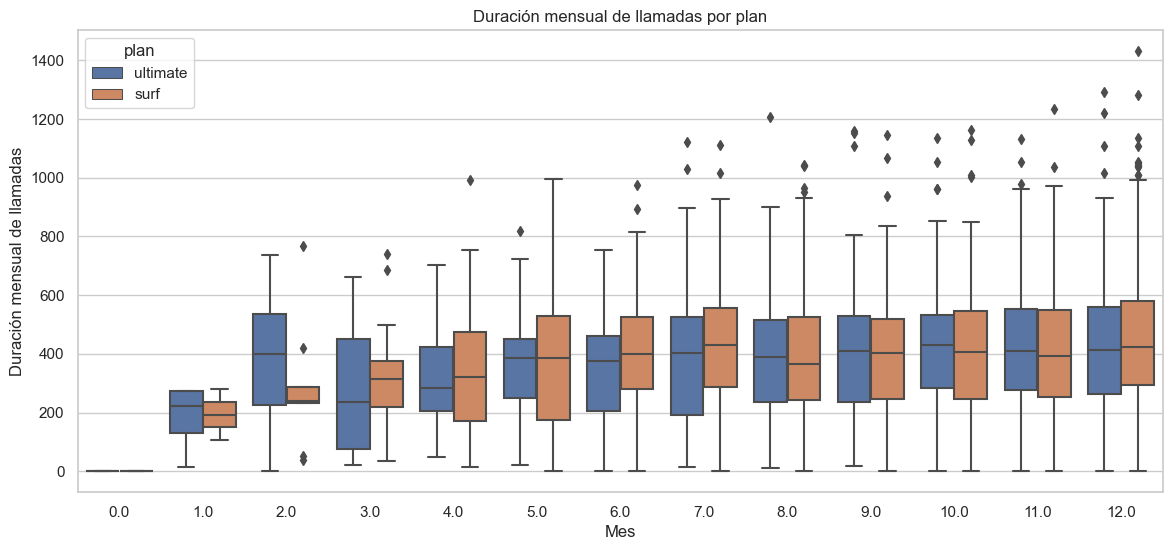

In [13198]:
# Trazo un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(14, 6))
sns.boxplot(x='month', y='duration_count', hue='plan', data=merged_data)
plt.title('Duración mensual de llamadas por plan')
plt.xlabel('Mes')
plt.ylabel('Duración mensual de llamadas')
plt.show()

* En cuanto a las llamadas, puedo observar que los usuarios de ambas tarifas tienen un consumo similar en la duración promedio de llamadas mensual, sobretodo, a partir de julio.

* Hay un poco más de variabilidad en las llamadas para la tarifa Ultimate que para Surf.

* También el tiempo de llamadas es muy similar en ambas tarifas; es decir, los usuarios tardan casí lo mismo en sus llamadas en ambas tarifas. Sin embargo, puedo observar que en Ultimate la dispersión de la duración de las llamadas en mayor que en Surf.

* Puedo observar valores atípicos en ambas tarifas a partir de julio siendo Surf la que registra mayores datos atípicos, sobretodo en diciembre.


## Mensajes

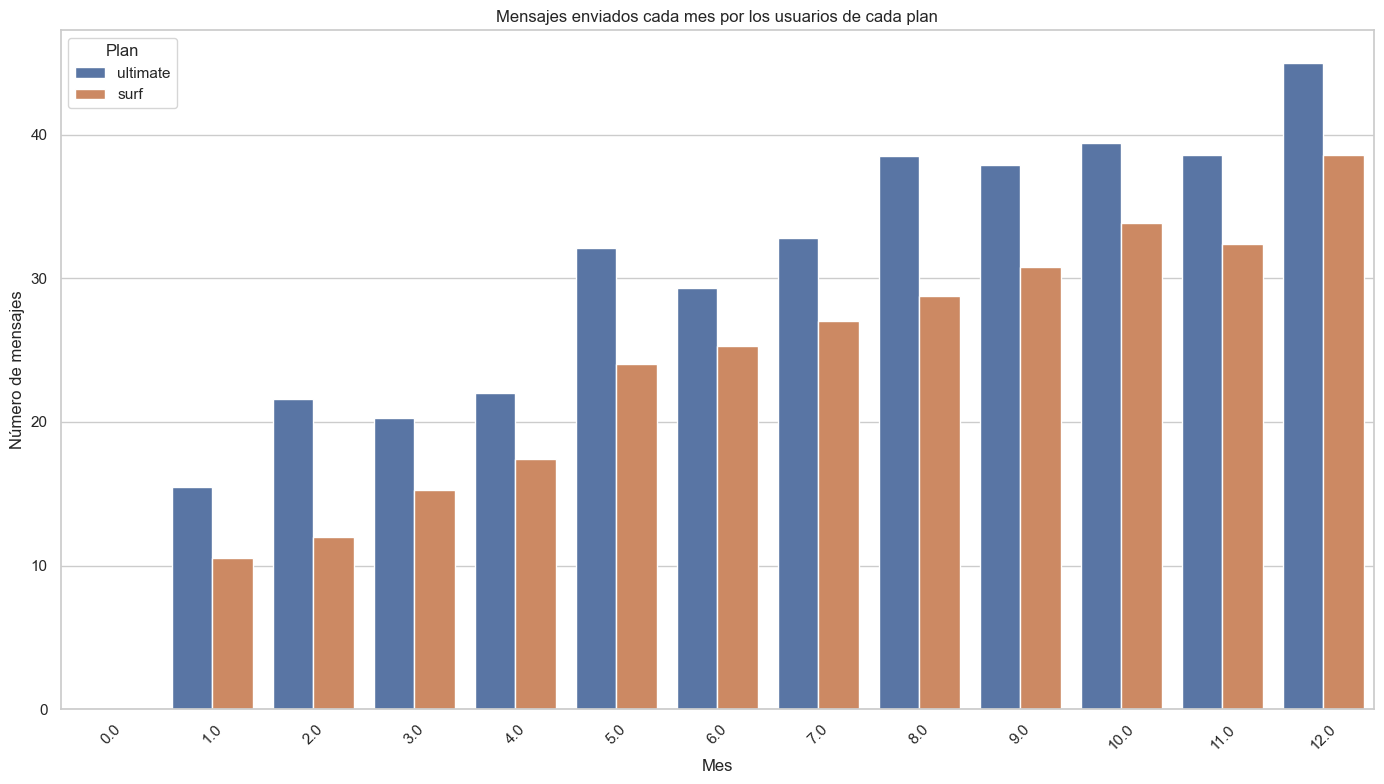

In [13199]:
# Comparo el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_sent_plan_monthly = merged_data.groupby(['user_id', 'month', 'plan'])['messages_count'].sum().reset_index().fillna(0)

plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='messages_count', hue='plan', data=messages_sent_plan_monthly, errorbar=None)
plt.title('Mensajes enviados cada mes por los usuarios de cada plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

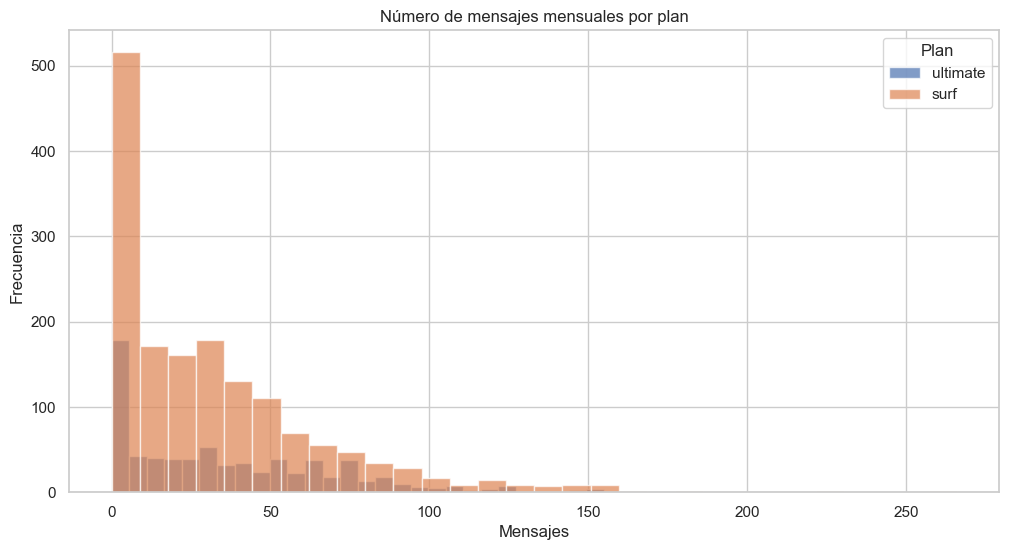

In [13200]:
#Calculo el número de mensajes enviados mes a mes para cada tarifa. Creo un histograma
messages_sent_plan_monthly_resume = merged_data.groupby(['user_id', 'plan', 'month'])['messages_count'].sum().reset_index()
message_month = messages_sent_plan_monthly_resume['plan'].unique()

plt.figure(figsize=(12, 6))
for plan in plans:
    subset = messages_sent_plan_monthly_resume[messages_sent_plan_monthly_resume['plan'] == plan]
    plt.hist(subset['messages_count'], bins=30, alpha=0.7, label=plan)
plt.title('Número de mensajes mensuales por plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [13201]:
# Calculo algunas estadísticas de los mensajes enviados mensualmente.
message_stats_by_plan = merged_data.groupby('plan')['messages_count'].agg(['mean', 'var', 'median', 'std']).reset_index()
message_stats_by_plan['mode'] = merged_data.groupby('plan')['messages_count'].agg(lambda x: x.mode()[0])
message_stats_by_plan.columns = ['Plan', 'Mean_Message_Sent', 'Variance_Message_Sent', 'Median_Message_Sent', 'Std_Message_Sent', 'Mode_Message_Sent']
message_stats_by_plan

,Plan,Mean_Message_Sent,Variance_Message_Sent,Median_Message_Sent,Std_Message_Sent,Mode_Message_Sent
0,surf,31.041165,1126.118076,24.0,33.557683,NaN
1,ultimate,37.343923,1209.827612,30.0,34.782576,NaN


In [13202]:
# Verifico la moda contando los valores
mode_messages_count = merged_data['messages_count'].value_counts()
mode_messages_count

messages_count
0.0      497
11.0      38
3.0       38
24.0      37
28.0      32
        ... 
159.0      1
168.0      1
147.0      1
141.0      1
148.0      1
Name: count, Length: 153, dtype: int64

In [13203]:
# Reviso la información de los usuarios que tienen cero en duración de llamadas
check_mode_merge_messages = merged_data[merged_data['messages_count'] == 0]
check_mode_merge_messages.groupby('plan')['user_id'].value_counts()

plan      user_id
surf      1042       12
          1498       11
          1171       11
          1359       11
          1406       10
                     ..
ultimate  1062        1
          1108        1
          1135        1
          1158        1
          1161        1
Name: count, Length: 115, dtype: int64

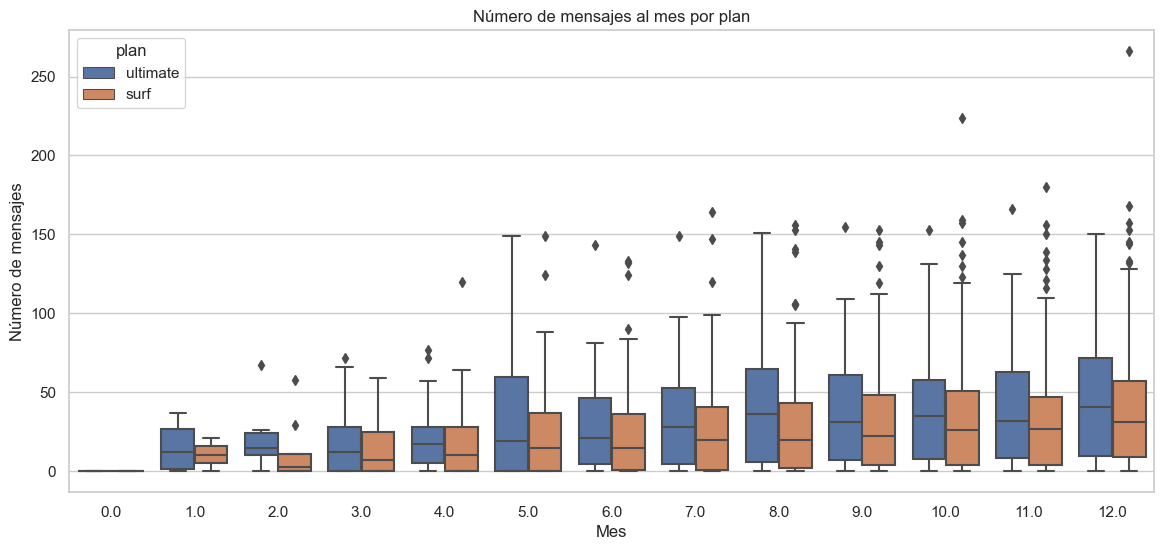

In [13204]:
# Trazo un diagrama de caja para visualizar la distribución de los mensajes al mes por tarifa
plt.figure(figsize=(14, 6))
sns.boxplot(x='month', y='messages_count', hue='plan', data=merged_data)
plt.title('Número de mensajes al mes por plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes')
plt.show()

* Puedo observar que los usuarios de la tarifa Ultimate tienen un mayor consumo de mensajes enviados mensualmente con respecto a los usuarios de Surf aunque en ambos casos observo una tendencia incremental mes con mes del numero de mensajes enviados.

* Hay una mayor variabilidad en los mensajes enviados por usuario en Ultimate en comparación con Surf.

* De acuerdo a la mediana, los usuarios de Ultimate suelen enviar más mensajes que Surf.

* En cuanto a valores atípicos, los usuarios de Surf suelen tener picos de envíos de mensajes fuera de lo normal para esa tarifa.



## Internet

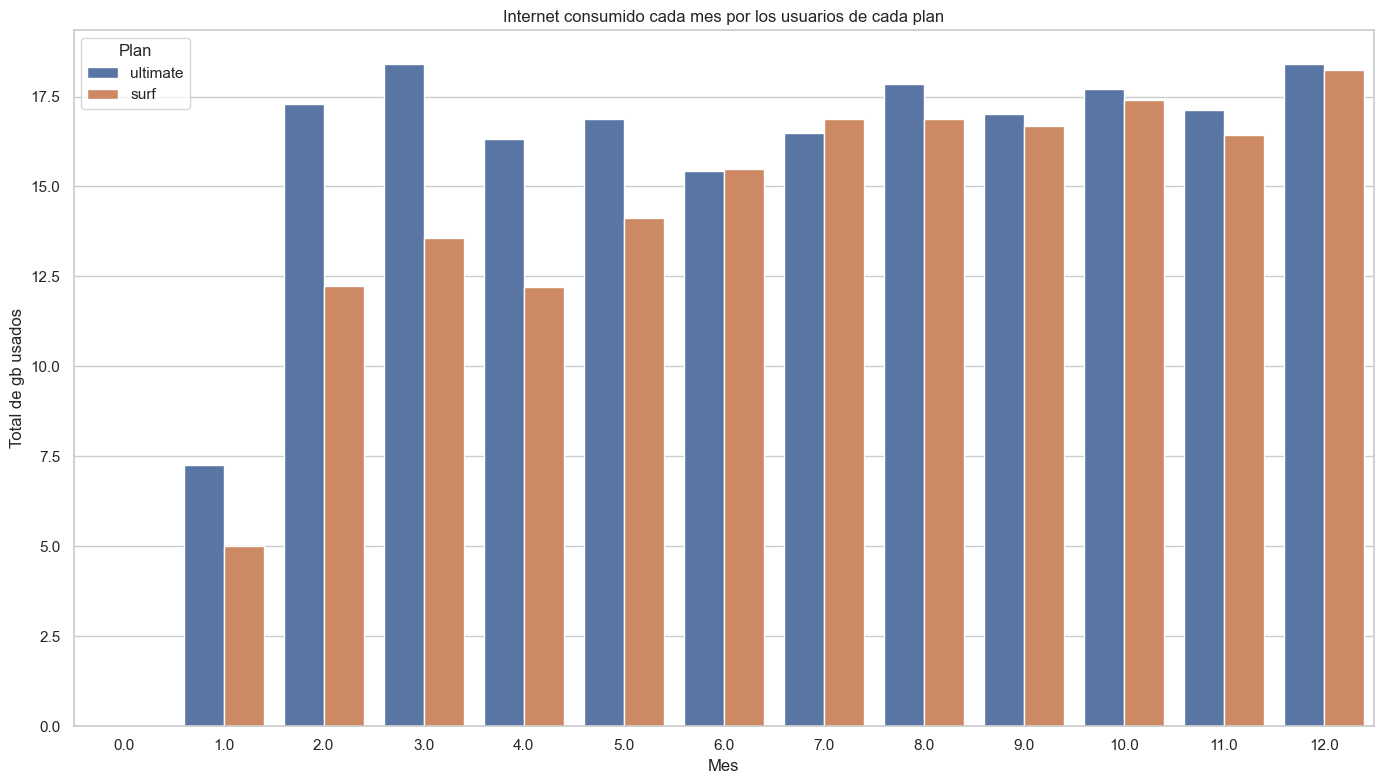

In [13205]:
# Comparo la cantidad de internet consumido por los usuarios por plan
internet_plan_monthly = merged_data.groupby(['user_id', 'month', 'plan'])['total_gb_used'].sum().reset_index().fillna(0)

plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='total_gb_used', hue='plan', data=internet_plan_monthly, errorbar=None)
plt.title('Internet consumido cada mes por los usuarios de cada plan')
plt.xlabel('Mes')
plt.ylabel('Total de gb usados')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

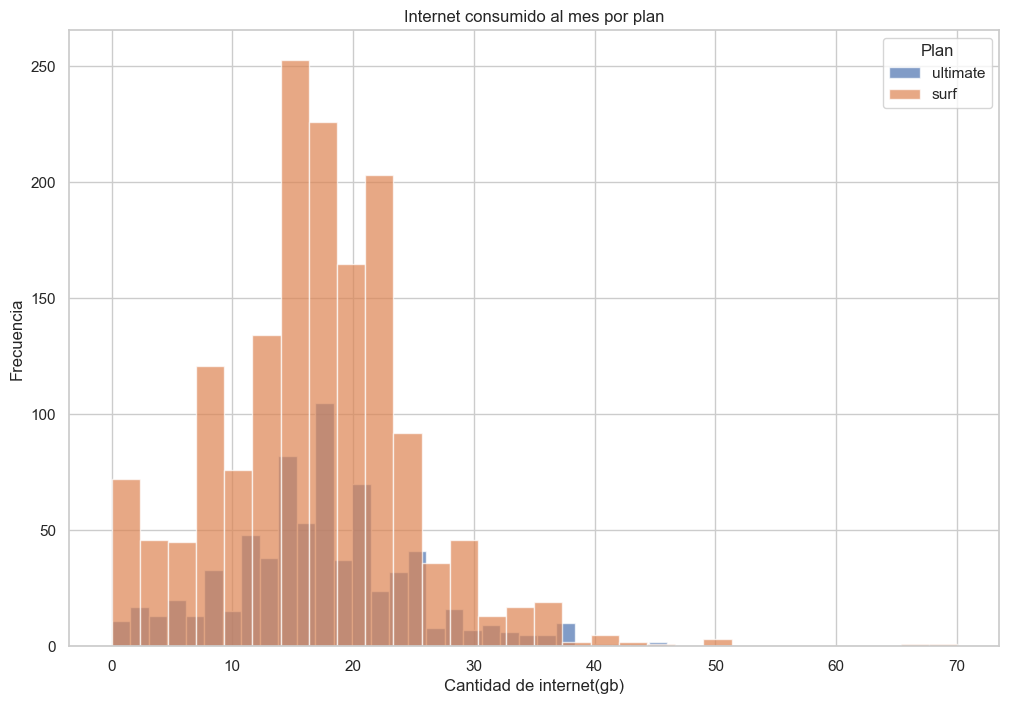

In [13206]:
#Calculo el tráfico de internet mensual para cada tarifa. Creo un histograma
internet_monthly = internet_plan_monthly['plan'].unique()

plt.figure(figsize=(12, 8))
for plan in plans:
    subset = internet_plan_monthly[internet_plan_monthly['plan'] == plan]
    plt.hist(subset['total_gb_used'], bins=30, alpha=0.7, label=plan)
plt.title('Internet consumido al mes por plan')
plt.xlabel('Cantidad de internet(gb)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [13207]:
# Calculo algunas estadísticas del tráfico de Internet. 
internet_stats_by_plan = merged_data.groupby('plan')['total_gb_used'].agg(['mean', 'var', 'median', 'std']).reset_index()
internet_stats_by_plan['mode'] = merged_data.groupby('plan')['total_gb_used'].agg(lambda x: x.mode()[0])
internet_stats_by_plan.columns = ['Plan', 'Mean_Gb_Used', 'Variance_Gb_Used', 'Median_Gb_Used', 'Std_Gb_Used','Mode_Gb_Used']
print(internet_stats_by_plan.round(2))

       Plan  Mean_Gb_Used  Variance_Gb_Used  Median_Gb_Used  Std_Gb_Used  \
0      surf         16.61             62.40            17.0         7.90   
1  ultimate         17.21             60.15            17.0         7.76   

   Mode_Gb_Used  
0           NaN  
1           NaN  


In [13208]:
# Verifico la moda contando los valores
mode_internet_count = merged_data['total_gb_used'].value_counts()
mode_internet_count

total_gb_used
17.0    168
18.0    163
15.0    141
16.0    132
21.0    125
19.0    122
20.0    119
14.0    115
13.0    111
12.0     85
22.0     83
9.0      69
23.0     67
24.0     66
11.0     64
25.0     62
7.0      55
10.0     51
8.0      43
4.0      42
2.0      41
26.0     37
5.0      36
28.0     31
6.0      29
27.0     27
1.0      27
0.0      26
3.0      23
29.0     20
30.0     18
31.0     14
33.0     14
36.0     11
37.0     11
35.0     10
34.0     10
32.0      8
38.0      7
41.0      3
40.0      3
46.0      3
42.0      3
51.0      2
39.0      2
49.0      1
44.0      1
70.0      1
66.0      1
Name: count, dtype: int64

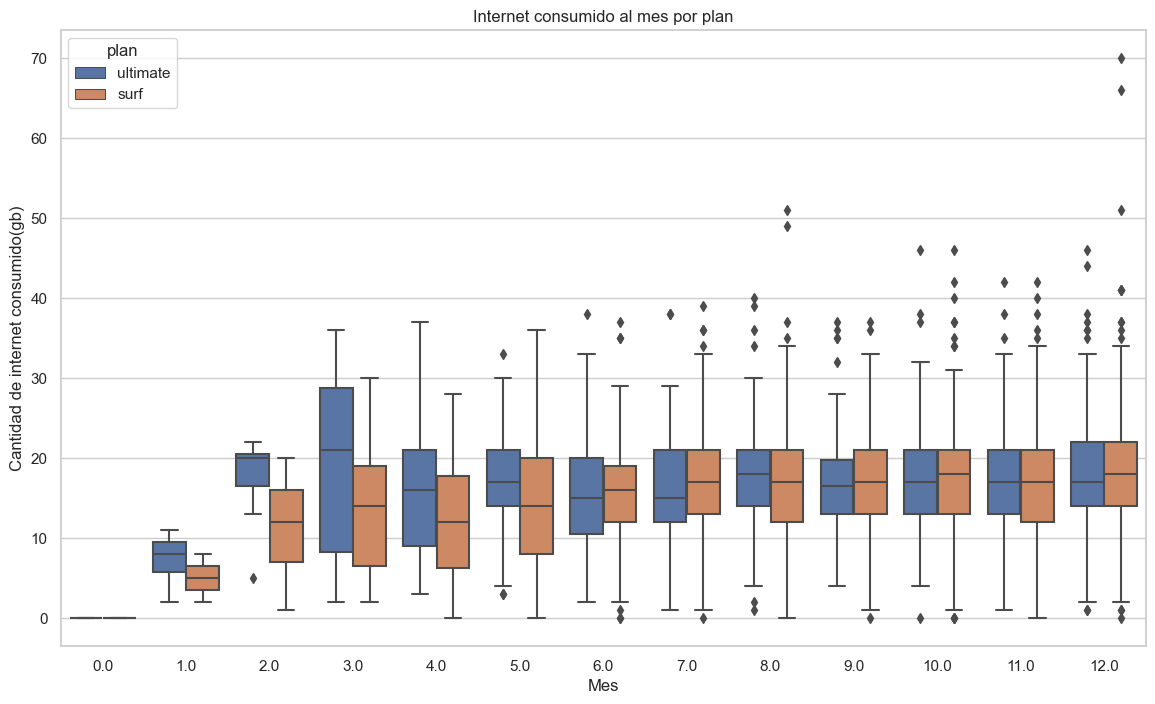

In [13209]:
# Trazo un diagrama de caja para visualizar la distribución de la cantidad de internet consumido al mes por tarifa
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='total_gb_used', hue='plan', data=merged_data)
plt.title('Internet consumido al mes por plan')
plt.xlabel('Mes')
plt.ylabel('Cantidad de internet consumido(gb)')
plt.show()

* Puedo observar que en promedio, los usuarios de Ultimate usan un poco más de datos que Surf.

* Ambas tarifas tienen la misma mediana, lo que indica que el 50% de los usuarios en cada tarifa usan menos de 17GB y la otra mitad usa más.

* No pude observar una tendencia clara de consumo mes con mes aunque a partir de julio, los usuarios de Surf excedieron la cantidad máxima de GB ofrecidos para dicha tarifa, la cual es de 15GB mensuales lo que les generó un costo extra mensual.


## Ingreso

In [13210]:
#Calculo el ingreso promedio mensual de cada plan
merged_data.groupby('plan')['total_revenue'].mean().round(2)

plan
surf        60.17
ultimate    72.30
Name: total_revenue, dtype: float64

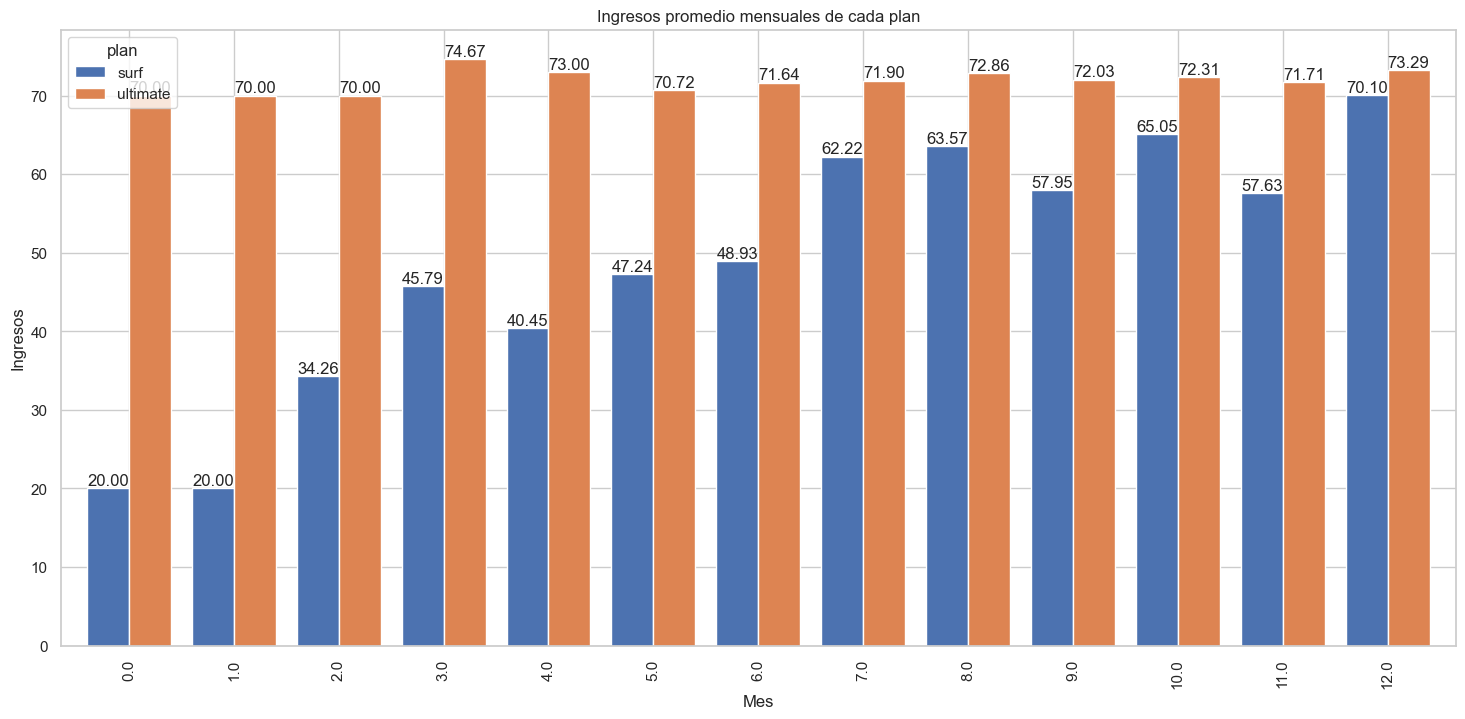

In [13211]:
# Comparo los ingresos promedio mensuales de cada plan. Trazo un gráfico para visualizarla.
revenue_mean_month = merged_data.groupby(['month', 'plan'])['total_revenue'].mean().round(2).unstack()
revenue = revenue_mean_month.plot(kind = 'bar',
                         title = 'Ingresos promedio mensuales de cada plan',
                         xlabel = 'Mes',
                         ylabel = 'Ingresos',
                         figsize = (18,8),
                         width = 0.8)

# Agrego etiquetas a cada barra
for container in revenue.containers:
    revenue.bar_label(container, fmt='%.2f')


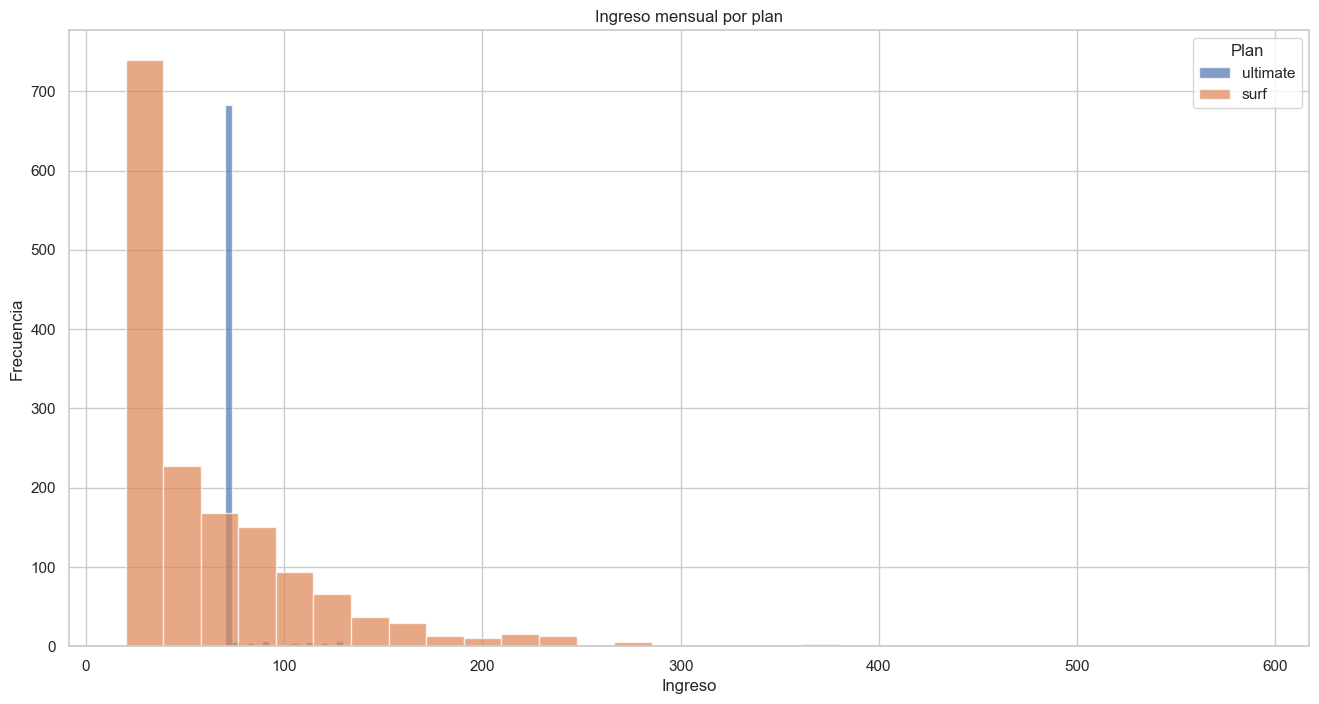

In [13212]:
#Calculo el ingreso mensual para cada tarifa. Creo un histograma.
income_monthly = merged_data.groupby(['user_id', 'month', 'plan'])['total_revenue'].sum().reset_index().fillna(0)
income_month = income_monthly['plan'].unique()

plt.figure(figsize=(16, 8))
for plan in plans:
    subset = income_monthly[income_monthly['plan'] == plan]
    plt.hist(subset['total_revenue'], bins=30, alpha=0.7, label=plan)
plt.title('Ingreso mensual por plan')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [13213]:
# Calculo el ingreso inicial mensual promedio de cada plan (renta mensual).
expected_monthly_income = merged_data.groupby(['user_id', 'plan','month'])['usd_monthly_pay'].sum().unstack()
expected_monthly_income = merged_data.groupby(['month', 'plan']).agg(number_of_users=('user_id', 'nunique'),total_monthly_revenue=('usd_monthly_pay', 'sum')).reset_index()
expected_monthly_income
expected_income = expected_monthly_income.pivot(index='month', columns='plan', values='total_monthly_revenue').fillna(0)
expected_income = expected_income.rename(columns={'surf': 'surf_expected', 'ultimate': 'ultimate_expected'})
expected_income


plan,surf_expected,ultimate_expected
month,,
0.0,120,280
1.0,40,280
2.0,180,490
3.0,460,840
4.0,1000,1470
5.0,1540,2030
6.0,1940,3290
7.0,2420,4130
8.0,3240,4970


In [13214]:
# Calculo el ingreso real mensual promedio de cada plan.
real_monthly_income = merged_data.groupby(['user_id', 'plan','month'])['total_revenue'].sum().unstack()
real_monthly_income = merged_data.groupby(['month', 'plan']).agg(number_of_users=('user_id', 'nunique'),total_real_monthly_revenue=('total_revenue', 'sum')).reset_index()
real_monthly_income
real_income = real_monthly_income.pivot(index='month', columns='plan', values='total_real_monthly_revenue').fillna(0).round(2)
real_income = real_income.rename(columns={'surf': 'surf_real', 'ultimate': 'ultimate_real'})
real_income


plan,surf_real,ultimate_real
month,,
0.0,120.00,280.0
1.0,40.00,280.0
2.0,308.31,490.0
3.0,1053.18,896.0
4.0,2022.74,1533.0
5.0,3637.11,2051.0
6.0,4746.28,3367.0
7.0,7528.86,4242.0
8.0,10298.75,5173.0


In [13215]:
# Calculo las estadísticas para ingresos esperados y reales de Surf y Ultimate
def calculate_statistics(df, plan_name):
    stats = df.describe().T
    stats['median'] = df.median()
    stats['range'] = df.max() - df.min()
    stats['variance'] = df.var()
    stats['std_dev'] = df.std()
    stats['cv'] = stats['std_dev'] / stats['mean']  # Coeficiente de variación
    return stats

stats_expected = calculate_statistics(expected_income[['surf_expected', 'ultimate_expected']], 'expected')
stats_real = calculate_statistics(real_income[['surf_real', 'ultimate_real']], 'real')
combined_stats = pd.concat([stats_expected, stats_real])
combined_stats = combined_stats.T
combined_stats = combined_stats[['surf_expected', 'surf_real', 'ultimate_expected', 'ultimate_real']].round(2)
combined_stats


plan,surf_expected,surf_real,ultimate_expected,ultimate_real
count,13.00,13.00,13.00,13.00
mean,2429.23,7308.84,3898.46,4026.62
std,2180.24,7282.11,3469.46,3601.12
min,40.00,40.00,280.00,280.00
25%,460.00,1053.18,840.00,896.00
50%,1940.00,4746.28,3290.00,3367.00
75%,3880.00,11242.02,6020.00,6195.00
max,6360.00,22292.65,10570.00,11067.00
median,1940.00,4746.28,3290.00,3367.00
range,6320.00,22252.65,10290.00,10787.00


In [13216]:
merged_data.groupby('plan')['user_id'].count()

plan
surf        1579
ultimate     724
Name: user_id, dtype: int64

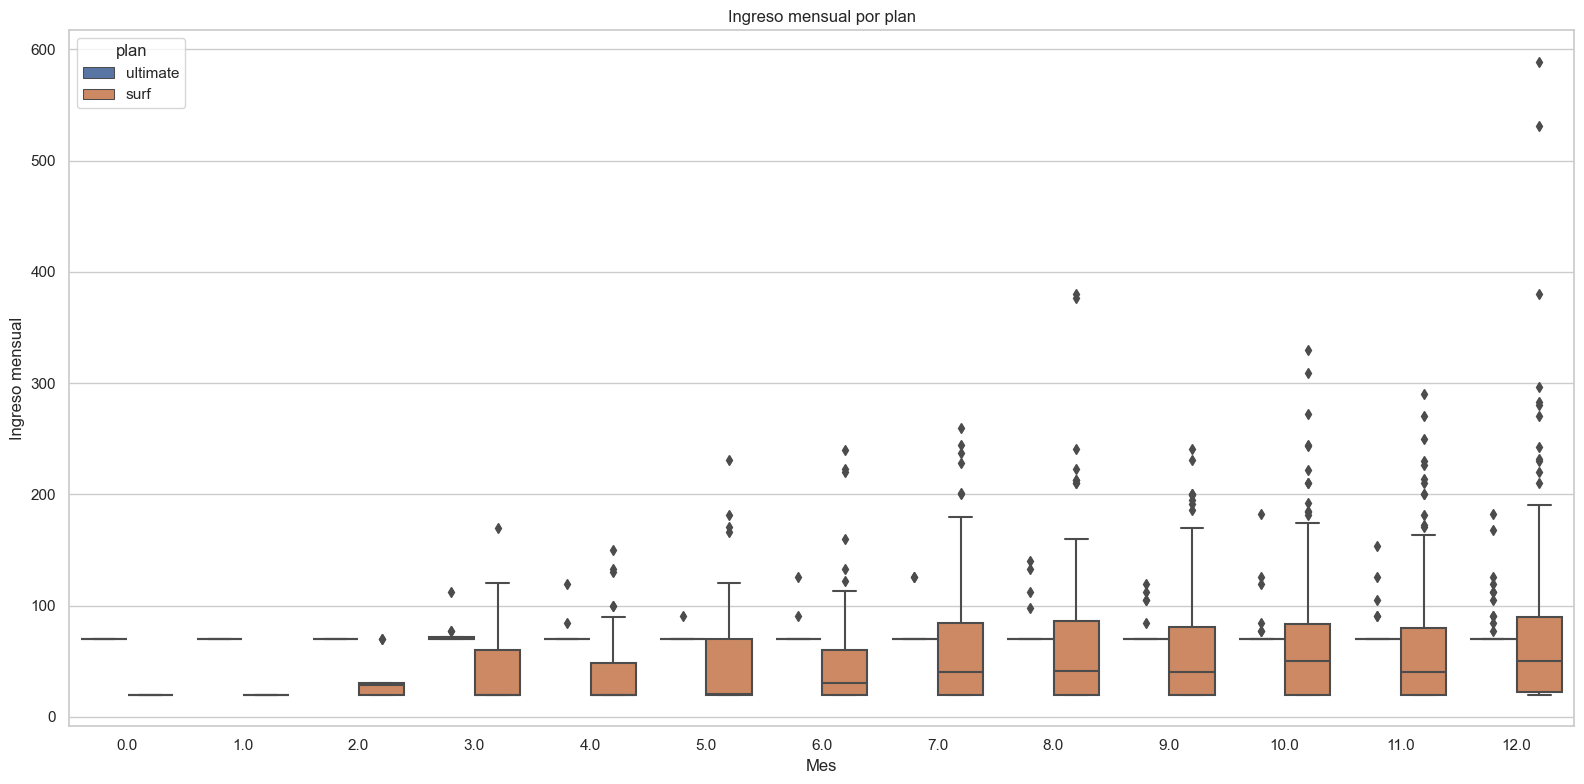

In [13217]:
# Trazo un diagrama de caja para el ingreso mensual por tarifa
plt.figure(figsize=(16, 8))
sns.boxplot(x='month', y='total_revenue', hue='plan', data=merged_data)
plt.title('Ingreso mensual por plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso mensual')
plt.tight_layout()
plt.show()

* Puedo observar que los ingresos reales para la tarifa Surf son mayores a los esperados inicialmente ya que el costo de la tarifa es de $20USD y en promedio los usuarios pagan $57.15USD mensualmente (más del doble de lo esperado inicialmente).

* En cambio, los usuarios de la tarifa Ultimate pagan en promedio $72.10USD al mes lo cuál no se aleja tanto de los $70USD iniciales.

* Sin embargo, esto no es indicativo de que la tarifa Surf sea más rentable que Ultimate ya que hay poco mas del doble de usuarios de Surf con respecto a Ultimate.

# Prueba de hipótesis estadísticas

## Prueba 1 de hipótesis

* h0 = No hay una diferencia significativa en los ingresos promedio entre los planes de llamada Ultimate y Surf.

* h1 = Hay una diferencia significativa en los ingresos promedio entre los planes de llamada Ultimate y Surf.

In [13218]:
# Pruebo las hipótesis
# Calculo los ingresos por plan
surf_income = real_monthly_income[real_monthly_income['plan'] == 'surf']['total_real_monthly_revenue']
surf_income
ultimate_income = real_monthly_income[real_monthly_income['plan'] == 'ultimate']['total_real_monthly_revenue']

# Realizo la prueba t de Student para ambos planes
t_stat, p_value = st.ttest_ind(surf_income, ultimate_income, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Rechazo o no la hipótesis nula?
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.")

T-statistic: 1.4567241953055294
P-value: 0.16286380836934122
No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.


INTENTARÉ APLICAR LA PRUEBA DE LEVENE PARA REVISAR LA IGUALDAD DE LAS VARIANZAS DE AMBAS MUESTRAS

In [13219]:
# Realizo el prueba de Levene
res = st.levene(surf_income, ultimate_income)
print(f"T-statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

T-statistic: 4.04649349945059
P-value: 0.05562108979378357


In [13220]:
# El p-value es de 0.0556 por lo que no hay suficiente evidencia para rechazar que las varianzas de ambas pruebas son iguales.
equal_var_levene = res.pvalue > 0.05

# Realizo la prueba t de Student para ambos planes
t_stat_1, p_value_1 = st.ttest_ind(surf_income, ultimate_income, equal_var=equal_var_levene)
print(f"T-statistic: {t_stat_1}")
print(f"P-value: {p_value_1}")

# Rechazo o no la hipótesis nula?
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.")

T-statistic: 1.4567241953055294
P-value: 0.15815230131746025
No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.


* Según la prueba de Levene no hay una diferencia significativa en las varianzas de los ingresos de ambas tarifas por lo que puedo asumir que las varianzas de ambos planes son iguales.

* Según la prueba de t de Student no hay evidencia suficiente para rechazar la hipótesis nula por lo que concluyo con que los ingresos de ambos planes son similares.


## Prueba 2 de hipótesis

* h0 = No hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones. 

* h1 = Hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.

In [13221]:
# Pruebo las hipótesis
# Filtro los ingresos por región
ny_nj_income = merged_data[merged_data['region'] == 'NY-NJ']['total_revenue'].dropna()
other_income = merged_data[merged_data['region'] == 'Other']['total_revenue'].dropna()

# Realizo la prueba t de dos muestras
t_stat, p_value = st.ttest_ind(ny_nj_income, other_income)
print(f"Valor p: {p_value}")

# Rechazo la hipótesis nula?
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.")


Valor p: 0.046579833893291386
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.


# Conclusión general



1. A lo largo de este análisis he trabajado con datos relacionados con el comportamiento del usuario en cuanto a las llamadas, mensajes e internet buscando cuál de las dos tarifas (Surf y Ultimate) genera más ingresos para la compañia.


2. Los hallazgos por rubro son los siguientes:

    DURACIÓN DE LLAMADAS:

        * Surf: Promedio de 403.22 minutos, varianza de 49,568.85, desviación estándar de 222.64.

        * Ultimate: Promedio de 403.95 minutos, varianza de 52,263.05, desviación estándar de 228.61.

    Conclusión: La duración de llamada promedio en ambas tarifas es muy similar así como sus varianzas lo cuál concluye en que no hay una diferencia notable en este rubro.

    MENSAJES ENVIADOS:

        * Surf: Promedio de 31.04 mensajes, varianza de 1,126.12, desviación estándar de 33.56.

        * Ultimate: Promedio de 37.34 mensajes, varianza de 1,209.83, desviación estándar de 34.78.

    Conclusión: Los usuarios de Ultimate envían en promedio más mensajes que los usuarios de Surf. Sin embargo, la variabilidad en ambas tarifas es similar.

    TRÁFICO DE INTERNET:

        * Surf: Promedio de 16.61 GB, varianza de 62.40, desviación estándar de 7.90.

        * Ultimate: Promedio de 17.21 GB, varianza de 60.15, desviación estándar de 7.76.

    Conclusión: Los usuarios de Ultimate usan ligeramente más datos que los de Surf pero la variabilidad calculada en ambas tarifas es similar.


3. En la primera prueba, analicé si existe una diferencia significativa en los ingresos promedio entre Ultimate y Surf. 

    La prueba t dio un valor p de 0.192, que es mayor que el nivel de significancia de 0.05 por lo que NO podemos rechazar la hipótesis nula ya que no existe evidencia suficiente para afirmar que los ingresos promedio entre las tarifas Ultimate y Surf son significativamente diferentes. 

    Según los datos obtenidos, ambas tarifas generan ingresos promedio similares por lo que no hay una tarifa que supere a la otro con base en los ingresos obtenidos.


4. En la segunda prueba, analicé si hay una diferencia significativa en los ingresos promedio entre los usuarios de área NY-NJ y los usuarios de otras regiones. 

    La prueba t dio un valor p de 0.030, que es menor que el nivel de significancia de 0.05 por lo que RECHAZAMOS la hipótesis nula ya que existe una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ con respecto a las otras áreas. 

    Es decir, NY-NJ genera ingresos promedio significativamente diferentes comparado con otras regiones.


5. Al no observarse una diferencia significativa en los ingresos de ambas tarifas en cuanto a las llamadas, los mensajes y el internet; recomiendo un estudio para conocer la satisfacción del usuario o bien, identificar patrones de uso para adecuar las tarifas con base en dicho comportamiento.


6. En cuanto a la región, al existir una diferencia significativa entre os usuarios del área NY-NJ y los usuarios de otras regiones, concluyo con que la ubicación geográfica puede influir en los ingresos generados. Sugiero un estudio de las preferencias del usuario por región para que las tarifas y las campañas publicitarias sean acorde a dichas preferencias según el área geográfica donde se encuentre el usuario.